# Ridge linear regression example

**Example using the ridge linear regression function in the stepAIC package**

The **ridge** function in the stepAIC module provides output of regression models and summary statistics using the following methods:

- RidgeCV: RidgeCV regression with default cross-validation using the MSE as the scoring criterion to optimize alpha
- RidgeAIC: Ridge regression using AIC as the scoring criterion to optimize alpha by trial
- RidgeBIC: Ridge regression using BIC as the scoring criterion to optimize alpha by trial
- RidgeVIF: Ridge regression using target VIF to optimize alpha by trial

Ridge regression adds a penalty to the loss function, which is the product of the regularization hyperparameter and the sum of the squares of the coefficients. This penalty shrinks the coefficients towards zero but does not force them to be exactly zero.

Ridge regression is useful for dealing with multicollinearity, where predictors are highly correlated, and when all candidate features should be included in the model.

#### Limitations of Ridge regression for feature selection and the utility of AIC and BIC

Unlike Lasso regression, Ridge regression does not have zeroing of selected coefficients as a goal. Therefore, Ridge regression generally does not select a subset of features for the final best model. Instead, Ridge regression retains all of the candiate features in the input data set and has the goal of minimizing the coefficient values as a strategy to reduce the variance inflation factors to mitigate the effects of multicollinearity.

AIC and BIC have limited value in optimizing Ridge regression. The AIC and BIC in Ridge regression is not sensitive to the alpha parameter because the AIC and BIC values are strongly affected by the number of model parameters. As the alpha parameter is adjusted, the AIC and BIC values change by a relatively small amount depending on the variance of the residuals at each value of alpha. This means that the AIC and BIC values across a wide range of alpha values do not penalize the model for having too many parameters in Ridge regression. Using AIC and BIC have the effect of choosing the lowest value of alpha, which is similar to performing ordinary linear regression without regularaization and with no mitigation of multicollinearity.

If feature selection is the goal of the analysis, then Stepwise or Lasso regression methods are generally better than Ridge regression for that purpose. If your analysis requires that all candidate features are retained in the final model, then Ridge regression is ideal for that purpose.

#### Acceptable VIF as the target for Ridge regression

Ridge regression reduces the Variance Inflation Factors of the features by adding a penalty term to the ordinary least squares regression. The magnitude of the penalty term is related to the regularization paramter (alpha) and the sum of the squared coefficients. At very low values of alpha there is negligible penalty and the Ridge regression results are practically the same as OLS. As the alpha value is increased, the penalty increases and the VIF values of the features decreases, which decreases the magnitude of the coefficients to mitigates the problem of multicollinearity.

Cross-validated ridge regression (e.g. using RidgeCV) does not always result in acceptable multicollinearity as indicated by VIF. While cross-validation helps in fine-tuning the regression coefficients, it does not always result in VIF values close to 1. Ideally the VIF of all features should be as close as possibe to VIF=1. This can be achieved using a trial and error method of evaluating the VIF values of the model features over a range of alpha values. 

The **ridge** function in stepAIC includes an algorithm (RidgeVIF) to find the model with the optimum value of alpha that will result in VIF values as close as possible to a user-specified target VIF (default target VIF=1.0). This assures that there will be acceptable multicollinearity for all features. The trade-off is that this algorithm reduces the model coefficients such that the target VIF will be achieved. The user has the option to specify any target for VIF to explore the balance between VIF and coefficient values.  

#### Example data set

This example uses the diabetes data described in the following tutorial by sklearn:

https://scikit-learn.org/stable/auto_examples/linear_model/plot_lasso_model_selection.html#sphx-glr-auto-examples-linear-model-plot-lasso-model-selection-py


Before running this notebook, first install the stepAIC module in your environment, if it is not already installed, using one of the following lines in the next cell:

In [14]:
# # Run the following commands to install stepAIC for the first time
# !pip install git+https://github.com/gjpelletier/stepAIC.git

# # Run the following commands to upgrade stepAIC to the latest versions
# !pip install git+https://github.com/gjpelletier/stepAIC.git --upgrade

In this example we will use the diabetes data set from sklearn

In [15]:
from sklearn.datasets import load_diabetes

X, y = load_diabetes(return_X_y=True, as_frame=True)
X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


Next, we will use the **ridge** function in stepAIC to fit the Ridge regression models and display the summary statistics of the regression results for the best fit models, as well as the best-fit coefficients of each model.

Fitting Ridge regression models, please wait ...


Ridge regression statistics of best models in model_outputs['stats']:


| Statistic          |         RidgeCV |        RidgeAIC |        RidgeBIC |        RidgeVIF |
|:-------------------|----------------:|----------------:|----------------:|----------------:|
| alpha              |     1.82499     |     0.001       |     0.001       |    86.4842      |
| r-squared          |     0.517344    |     0.517748    |     0.517748    |     0.507933    |
| adjusted r-squared |     0.504997    |     0.505412    |     0.505412    |     0.495345    |
| nobs               |   442           |   442           |   442           |   442           |
| df residuals       |   431           |   431           |   431           |   431           |
| df model           |    10           |    10           |    10           |    10           |
| F-statistic        |    46.1976      |    46.2724      |    46.2724      |    44.4897      |
| Prob (F-statistic) |

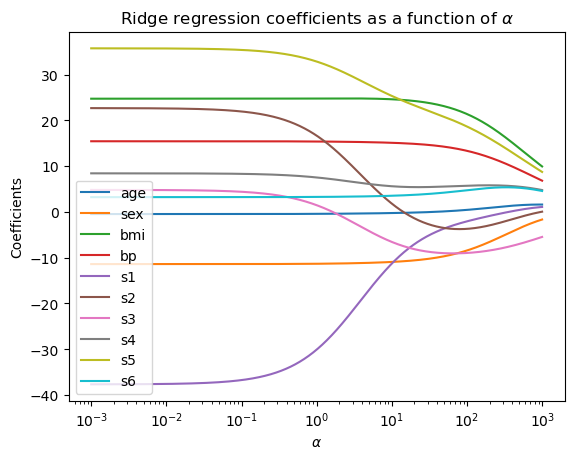

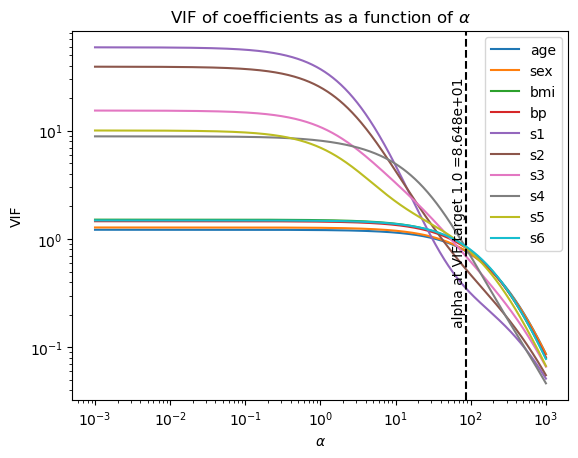

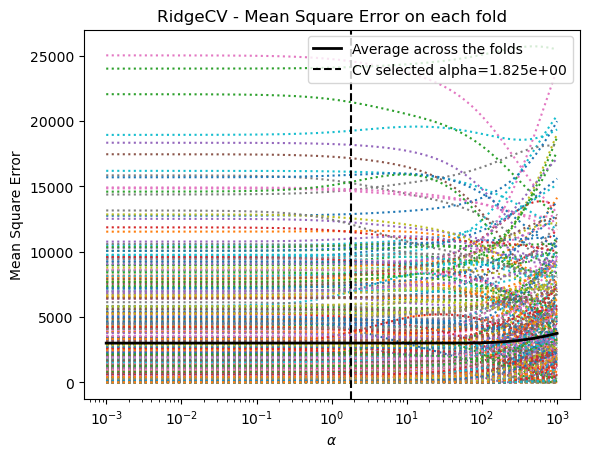

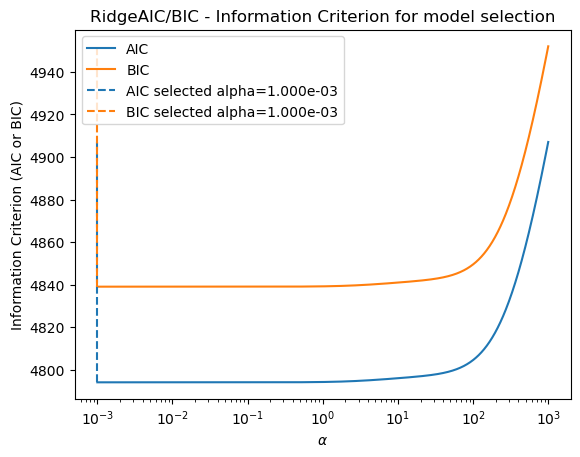

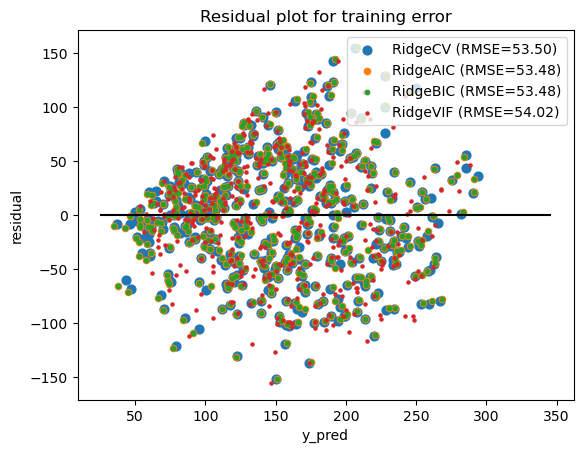

In [16]:
from stepAIC import ridge

model_objects, model_outputs = ridge(X, y, alpha_min=1e-3, alpha_max=1e3)

Note that the VIF results using RidgeCV show substantially reduced multicollinearity (2 features with VIF>10) compared with results of Ridge_AIC and Ridge_BIC (4 features with VIF>10). However, the multicollinearity for RidgeCV, RidgeAIC, and RidgeBIC is excessive. Using AIC and BIC to optimize the ridge regression is especially problematic. This is because AIC and BIC have limited value in optimizing Ridge regression. The lowest AIC and BIC values occur at the lowest vales of alpha, which is similar to performing ordinary linear regression with no regularization and no reduction in VIF. The AIC and BIC in Ridge regression is not sensitive to the alpha parameter because the AIC and BIC values are strongly affected by the number of model parameters. As the alpha parameter is adjusted, the AIC and BIC values change by a relatively small amount depending on the variance of the residuals at each value of alpha. This means that the AIC and BIC values across a wide range of alpha values do not penalize the model for having too many parameters in Ridge regression.

The RidgeVIF method is able to find a model where all features have acceptable VIF<5, with all VIF values as close as possible to the target VIF (default target VIF=1.0). The model skill for RidgeVIF is similar to the other methods. 